In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
env = gym.make('Breakout-v0')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(4)

# Agent

In [6]:
callback = JupyterCallback()

In [7]:
agent = DeepQAgent(env, frames_per_action=4)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<Breakout-v0>>>,
    learning_rate=1e-05,
    discount_factor=0.99,
    exploration_rate=1.0,
    exploration_decay=0.9998,
    exploration_min=0.1,
    image_size=(84, 84),
    frames_per_action=4,
    replay_size=20000
)

In [8]:
res_random = agent.play()
res_random

100%|██████████| 30/30 [00:15<00:00,  1.95game/s]


array([ 0.,  2.,  1.,  0.,  3.,  2.,  1.,  3.,  0.,  2.,  2.,  2.,  0.,
        2.,  1.,  0.,  1.,  1.,  0., -1.,  0.,  2.,  0.,  0.,  0., -1.,
        4.,  2.,  0.,  2.])

In [9]:
res_random.mean()

1.0333333333333334

In [10]:
agent.observe(10000)

100%|██████████| 10000/10000 [00:58<00:00, 168.49frame/s]


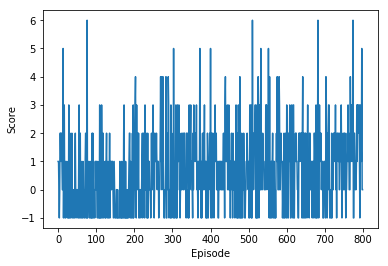

100%|██████████| 800/800 [1:15:51<00:00,  5.69s/episode]


In [11]:
agent.train(episodes=800, callback=JupyterCallback())

In [12]:
res_trained = agent.play()
res_trained

100%|██████████| 30/30 [00:13<00:00,  2.31game/s]


array([1., 1., 1., 2., 1., 1., 3., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1.,
       3., 1., 1., 2., 3., 3., 1., 1., 1., 1., 1., 1., 2.])

In [13]:
res_trained.mean()

1.5